# Using Machine learning approach to predict maximum possible magnitude of induced earthquakes. 

#### We run 4000 different simulations with pore-pressure conditions from Oklahoma region to predict the magnitude of induced earthquakes. We use both regression as well as Classification method to learn more about induced earthquakes.

In [207]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor
import pymc
np.set_printoptions(suppress=True)

from sklearn.model_selection import train_test_split

### Functions

In [208]:
def load_data(model):
    params = np.loadtxt('rupturemodel_'+model+'_4.txt', delimiter = ',')
    m = params.shape[0]
    n = params.shape[1]-1
    y = params[:,0]
    params = params[:,1:n+1]
    return m, n, params, y



# Main program

## Regression

## We are running a regression problem with RMS height of fault only

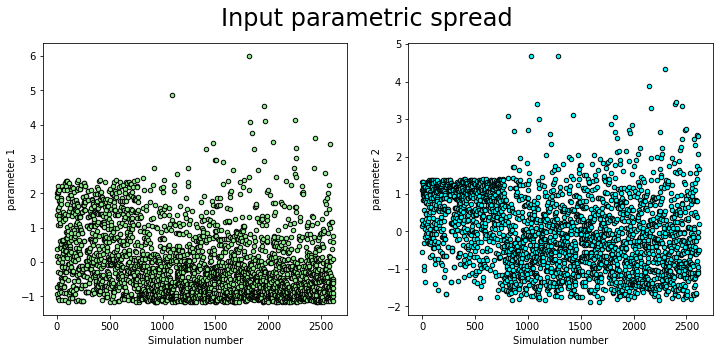

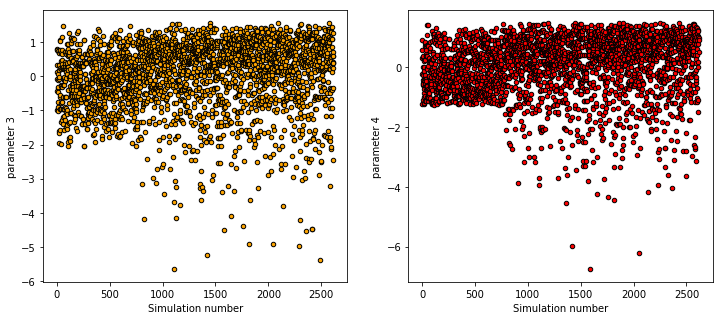

In [209]:
# Load and clean data
m, n, params, y = load_data('aug18')

# normalize the parameters for the training data file
train_mean = np.mean(params, axis=0)
train_std = np.std(params, axis=0)
params = params-train_mean
params = params/train_std 
# Since we are doing supervised learning, it is convinient to take a general look at the data.
len_of_data=y.shape[0]
x= np.linspace(0, len_of_data-1,len_of_data )
# Take a look at few parameteric spread.
figure, (ax1, ax2)  = plt.subplots(1, 2, figsize=(12, 5))
figure.suptitle('Input parametric spread', fontsize= 24)
ax1.scatter(x,params[::,3], facecolors='lightgreen', edgecolors='black', s=20, label='5 km away')
ax2.scatter(x,params[::,2], facecolors='cyan', edgecolors='black', s=20, label='5 km away')
ax1.set_xlabel('Simulation number')
ax1.set_ylabel('parameter 1')
ax2.set_xlabel('Simulation number')
ax2.set_ylabel('parameter 2')
plt.show()

figure, (ax1, ax2)  = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(x,params[::,4], facecolors='orange', edgecolors='black', s=20, label='5 km away')
ax2.scatter(x,params[::,5], facecolors='red', edgecolors='black', s=20, label='5 km away')
ax1.set_xlabel('Simulation number')
ax1.set_ylabel('parameter 3')
ax2.set_xlabel('Simulation number')
ax2.set_ylabel('parameter 4')
plt.show()


# Create Model


### Hyper- parameters





In [210]:
Hidden_layers= 3.0
HIDDEN_LAYER_SIZE = 10
LEARNING_RATE = 0.1
VALIDATION_SPLIT = 0.30

### TRAIN MODEL

In [211]:
X_train, X_test, y_train, y_test = train_test_split(params, y, test_size=VALIDATION_SPLIT, random_state=42)



In [212]:
clf = MLPRegressor(hidden_layer_sizes = [HIDDEN_LAYER_SIZE,HIDDEN_LAYER_SIZE,HIDDEN_LAYER_SIZE],
                             activation = 'tanh',
                             alpha = LEARNING_RATE,
                             solver = 'lbfgs').fit(X_train, y_train)
    

### Validate data

In [213]:
y_predict_output = clf.predict(X_test)

In [214]:
from scipy import stats

line2 = 1.0*y_test

Accuracy of NN regressor on test set: 0.80
Accuracy of NN regressor on train set: 0.85


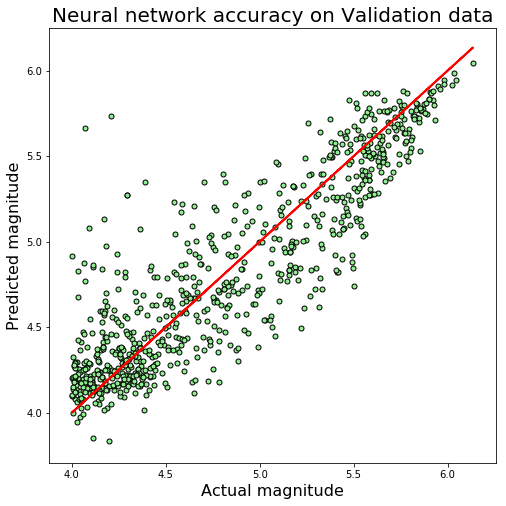

In [215]:
fig, ax = plt.subplots(figsize=(8,8))

plt.xlabel('Actual magnitude', fontsize = 16)
plt.ylabel('Predicted magnitude', fontsize = 16)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_predict_output)
line = slope*y_test+intercept

plt.plot( y_test, line2, linewidth=2, color='r')
plt.scatter(y_test, y_predict_output, facecolors='lightgreen', edgecolors='black', s=25)
plt.title('Neural network accuracy on Validation data', fontsize = 20)

print('Accuracy of NN regressor on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print('Accuracy of NN regressor on train set: {:.2f}'
     .format(clf.score(X_train, y_train)))

## We are running the regression problem with full fault spectrum using PCA analysis

In [216]:
m, n, params, y = load_data('oct09')
train_mean = np.mean(params, axis=0)
train_std = np.std(params, axis=0)

# normalize the parameters for the training data file

params = params-train_mean
params = params/train_std

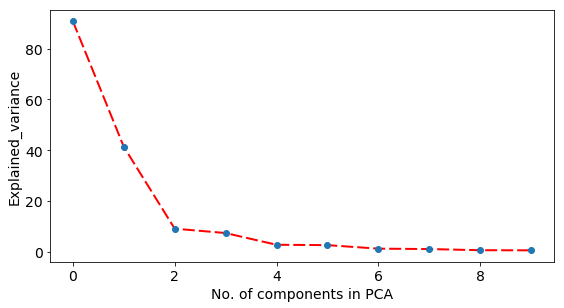

In [217]:
from sklearn.decomposition import PCA

# get PCA values of parameters that are related to fault geometry
my_model = PCA(10)  # project from data.shape to 10 dimensions
roughness_data= params[:,0:1599]
projected = my_model.fit_transform(roughness_data)
plt.figure(1, figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(my_model.explained_variance_/10.0, linewidth=2, dashes=[6, 2], color='red')
plt.plot(my_model.explained_variance_/10.0, 'o')
plt.axis('tight')
plt.xlabel('No. of components in PCA')
plt.ylabel('Explained_variance')
plt.show()


# collect all the parameters that are not related to the fault geometry
params_other_than_rougness= params[:,1599::]
params_all_with_pca= np.concatenate((projected, params_other_than_rougness), axis=1)

### TRAIN MODEL

In [218]:
X_train, X_test, y_train, y_test = train_test_split(params, y, test_size=VALIDATION_SPLIT, random_state=42)
clf = MLPRegressor(hidden_layer_sizes = [10,10,10, 10],
                             activation = 'relu',
                             alpha = 5.0,
                             solver = 'lbfgs').fit(X_train, y_train)



### PREDICT MODEL

Accuracy of NN regressor on test set: 0.74
Accuracy of NN regressor on train set: 0.82


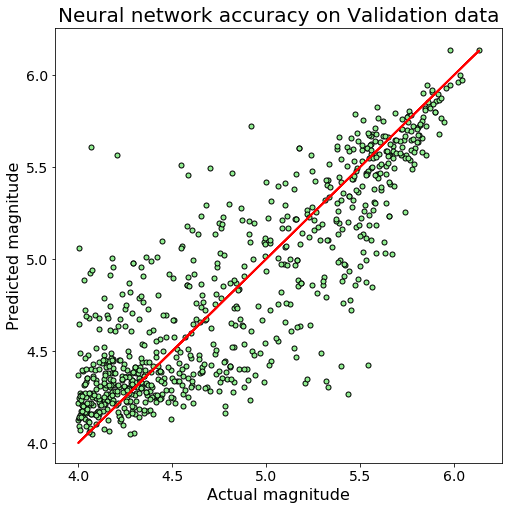

In [219]:
y_predict_output = clf.predict(X_test)

fig, ax = plt.subplots(figsize=(8,8))

plt.xlabel('Actual magnitude', fontsize = 16)
plt.ylabel('Predicted magnitude', fontsize = 16)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_predict_output)
line = slope*y_test+intercept

plt.plot( y_test, line2, linewidth=2, color='r')
plt.scatter(y_test, y_predict_output, facecolors='lightgreen', edgecolors='black', s=25)
plt.title('Neural network accuracy on Validation data', fontsize = 20)

print('Accuracy of NN regressor on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print('Accuracy of NN regressor on train set: {:.2f}'
     .format(clf.score(X_train, y_train)))

## Classification problem

## We are running the problem with RMS height of fault only, but this time, we are just interested to know if the rupture will b